In [1]:
from fastai import *
from fastai.vision import *
from fastai.widgets import *
import torch
defaults.device = torch.device('cpu')
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [2]:
folder = 'memes'
file = 'urls_memes.csv'

In [4]:
folder = 'non_meme'
file = 'urls_gen.csv'

In [5]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/non_meme'),
 PosixPath('data/memes'),
 PosixPath('data/urls_gen.csv'),
 PosixPath('data/urls_memes.csv')]

In [7]:
classes = ['memes', 'non_meme']

In [ ]:
download_images(path/file, dest, max_pics=300, max_workers=4)

In [8]:
for c in classes:
    verify_images(path/c, delete=True)

In [9]:
np.random.seed(42)
ds_tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['memes', 'non_meme'], 2, 452, 113)

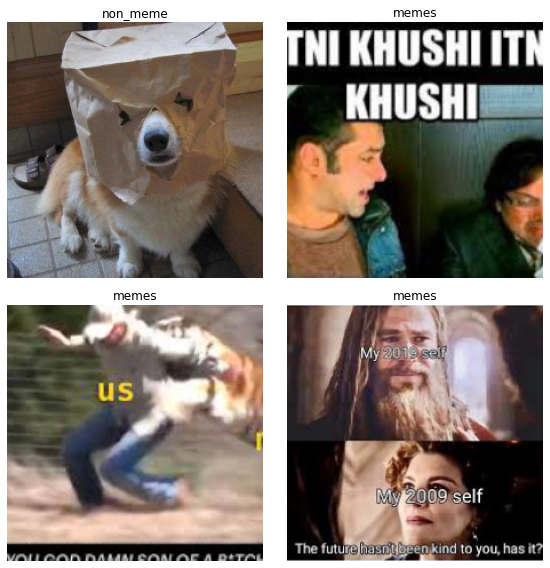

In [11]:
data.show_batch(rows=2)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [13]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.712948,0.326509,0.884956,01:21
1,0.436936,0.180293,0.955752,01:28
2,0.305204,0.208048,0.964602,01:20
3,0.218416,0.221604,0.964602,01:19
4,0.172255,0.213186,0.973451,01:24
5,0.140643,0.205539,0.973451,01:16


In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


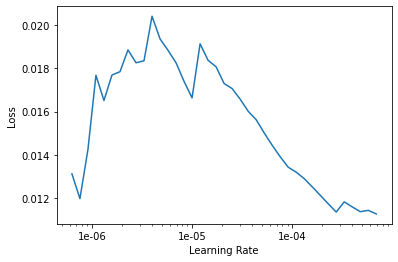

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(2e-05, 3e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.033842,0.285923,0.946903,01:46
1,0.018916,0.263873,0.946903,01:58


In [21]:
learn.save('stage-2')

In [22]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (452 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non_meme,non_meme,non_meme,non_meme,non_meme
Path: data;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
memes,memes,non_meme,memes,memes
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

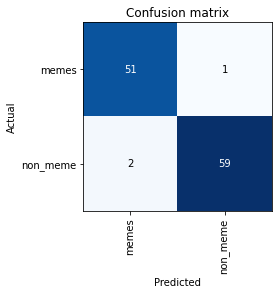

In [24]:
interp.plot_confusion_matrix()

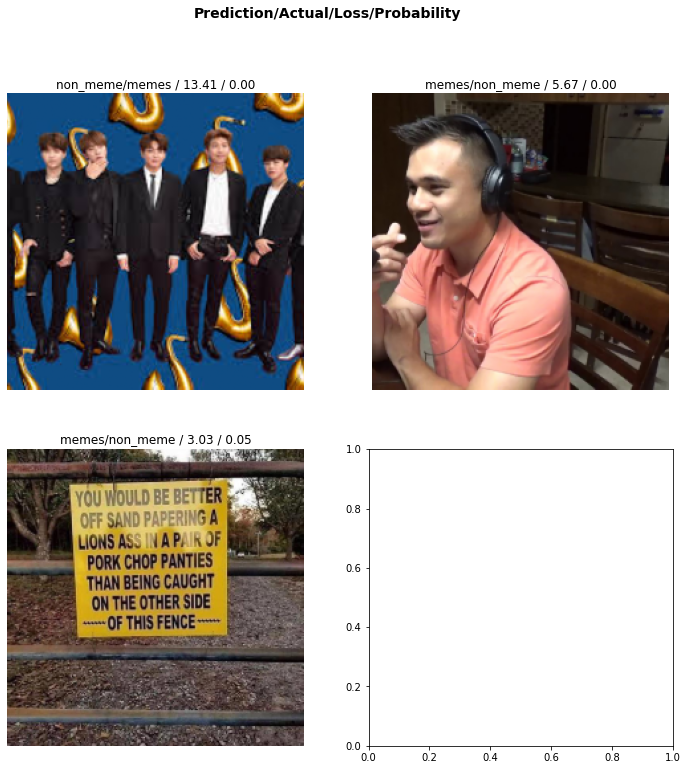

In [25]:
interp.plot_top_losses(k=3)

In [26]:
learn.export()

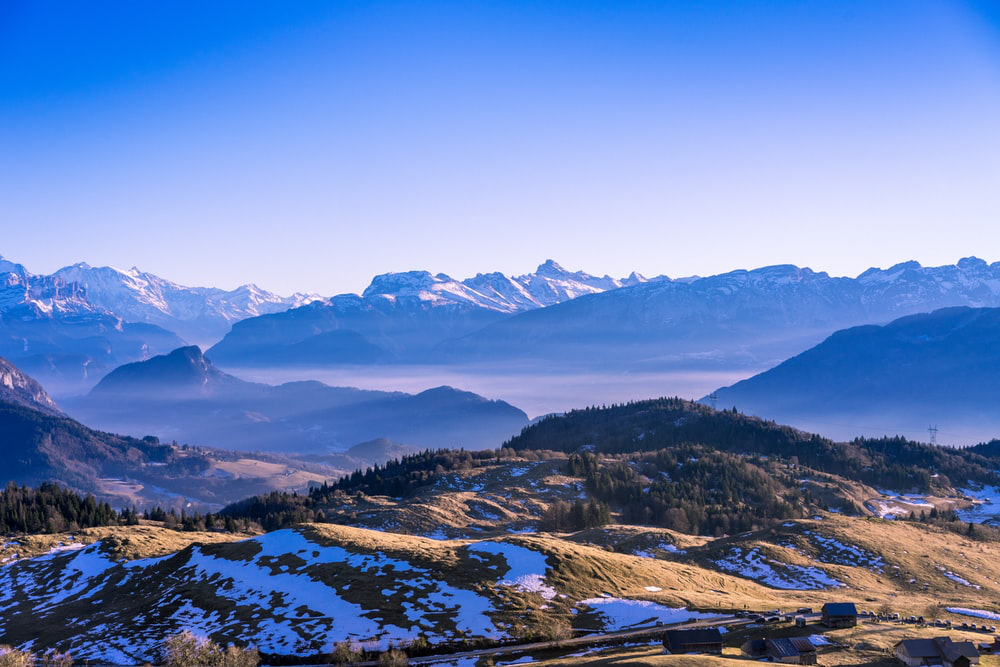

In [31]:
img_non_meme = open_image(path/'test_non_meme.jpeg')
img_non_meme

In [29]:
learn = load_learner(path)

In [32]:
pred_class, pred_idx, outputs = learn.predict(img_non_meme)
pred_class

Category non_meme

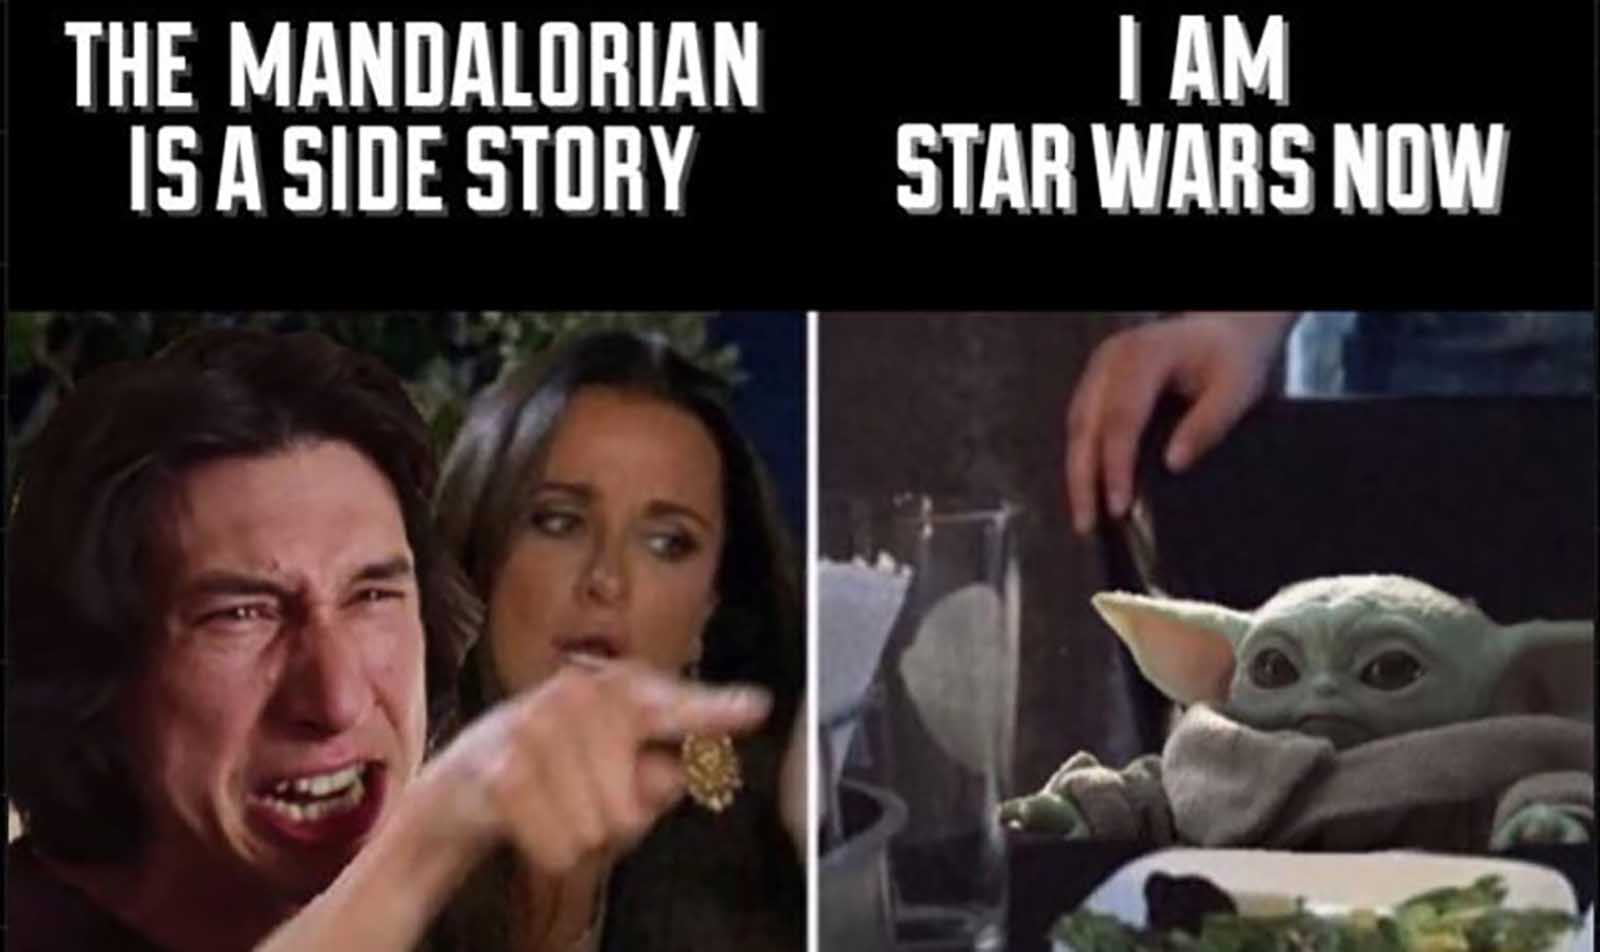

In [34]:
img_meme = open_image(path/'test_meme.jpg')
img_meme

In [35]:
pred_class, pred_idx, outputs = learn.predict(img_meme)
pred_class

Category memes